# lec03_basic_model_이미지(fashion)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## Seed 고정

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)  # tensor seed 고정
np.random.seed(1234)      # 행열 연산 seed 고정

# Data Load

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape,y_train.shape, X_test.shape,X_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000, 28, 28))

In [4]:
X_train[:1].shape,y_train[:1],X_train[:1]

((1, 28, 28),
 array([9], dtype=uint8),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
            0,   1,   1,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
            4,   0,   0,   3],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            6,   0, 102, 204, 176, 

In [5]:
LABEL_NAME__ = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# EDA
- imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    - 픽셀 좌표값을 색으로 채워서 그림으로 보여줌(행열의 픽셀 좌표를 가지고 있어야 함)
<pre>
- Z = 픽셀 값을 갖는 행렬
    plt.imshow(Z)
    plt.show()
<br><br>
<pre>
<b>matplotlib.pyplot.imshow(X, cmap=None, </b>
                    norm=None, aspect=None, interpolation=None, alpha=None
                    , vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None

## target 분포도

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64


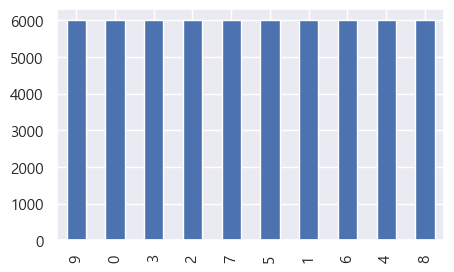

In [6]:
print(pd.Series(y_train).value_counts().sort_index())
plt.figure(figsize=(5,3))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## fashion : n번 이미지 

In [7]:
plt.figure(figsize=(5,3))
s=pd.Series(y_train)
idx=s[s.values==9].index[:30].values

idx_list=[]
for i in range(10):
    idx=s[s.values==i].index[:10].values
    # print(idx)
    idx_list.extend(idx)
len(idx_list)

100

<Figure size 500x300 with 0 Axes>

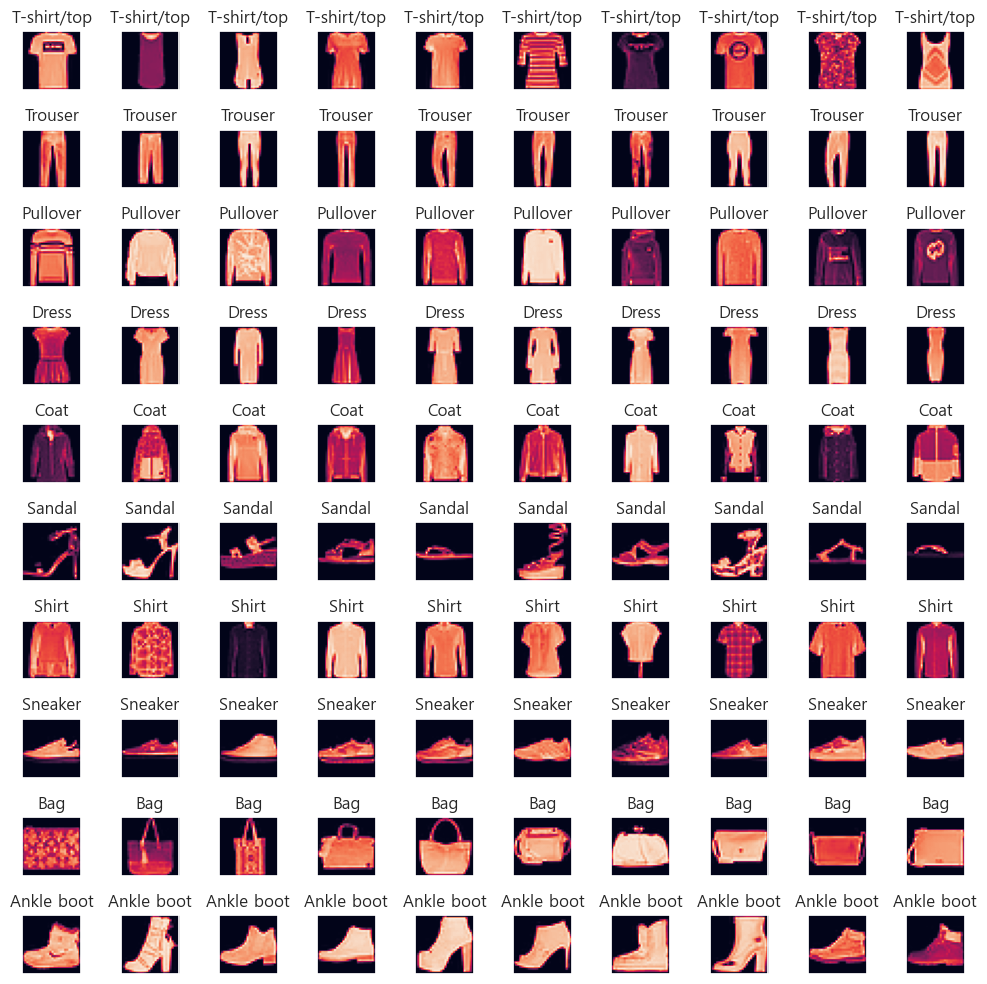

In [8]:
fig,axes= plt.subplots(10,10,figsize=(10,10))

# for i  in range(10):
for i,x  in enumerate(idx_list):
    # print(i,x)
    r=i//10
    c=i%10
    axes[r][c].imshow(X_train[x])
    axes[r][c].set_title(LABEL_NAME__[y_train[x]])
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
plt.tight_layout()
plt.show()

# 전처리 가공

## Flatten
- 뉴럴 네트워크에 데이터를 집어넣기 위해서는 1차로 바꿔야 함
- 이미지 픽셀 28*28 : 행렬(2D) --> array(1D)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[:1].shape # [[[ 0. 60000*28*28     # 한장(28*28)

(1, 28, 28)

In [11]:
X_train[0].shape     #  [[ 0,...,28], # 픽셀
                     #   [ 0,...,28],
                     #  ]

(28, 28)

In [12]:
X_train[0][0].shape  # [ 0,...,0] # 컬러 픽셀(한줄의 픽셀)

(28,)

In [13]:
X_train[0].flatten().shape

(784,)

In [14]:
X_train=X_train.reshape(60000,-1)
X_train.shape # 한줄이 하나의 이미지
X_test=X_test.reshape(10000,-1)

## 정규화(픽셀값 스케일링)
- 0 ~ 255 픽셀 값을 0 ~ 1 값으로 변경
- MinMaxScaler

In [15]:
X_train_scaler=X_train/255.0
X_test_scaler=X_test/255.0

print(X_train[:1])
print(X_train_scaler[:1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
    0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
   36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
    0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
    0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
    0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
  127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
    1   1   0 200 232 232 233 229 223 

## 타켓 더미화
- sklearn: OneHotEncoder(),  get_dummies()
- keras : utils.to_categorical
- 0 ~ 9 숫자 : 원핫인코딩
<pre>
    - 0 : 1 0 0 0 0 0 0 0 0 0
    - 1 : 0 1 0 0 0 0 0 0 0 0

In [16]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh = to_categorical(y_test, num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


# 모델

In [17]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal

In [18]:
model = Sequential()
#               input_shape=(28,28) or input_dim= 28*28
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #한장씩 들어와야 함 (28*28)
model.add(Dense(units=100,  activation='relu'))             
model.add(Dense(units=60,  activation='relu'))              
model.add(Dense(units=10,  activation='softmax'))           
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
fit_hisroty = model.fit(X_train_scaler, y_train_oh, validation_data=(X_test_scaler, y_test_oh), batch_size = 128, epochs=10)
print(fit_hisroty)
print(model.evaluate(X_test_scaler, y_test_oh))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5322 - accuracy: 0.8156 - val_loss: 0.4308 - val_accuracy: 0.8414
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3733 - accuracy: 0.8665 - val_loss: 0.3888 - val_accuracy: 0.8584
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3336 - accuracy: 0.8791 - val_loss: 0.3714 - val_accuracy: 0.8663
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3071 - accuracy: 0.8870 - val_loss: 0.3411 - val_accuracy: 0.8778
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2870 - accuracy: 0.8929 - val_loss: 0.3534 - val_accuracy: 0.8723
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2739 - accuracy: 0.8974 - val_loss: 0.3469 - val_accuracy: 0.8753
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2601 - accuracy: 0.9031 - val_loss: 0.3329 - val_accuracy: 0.8807
Epoch 

## 평가 시각화

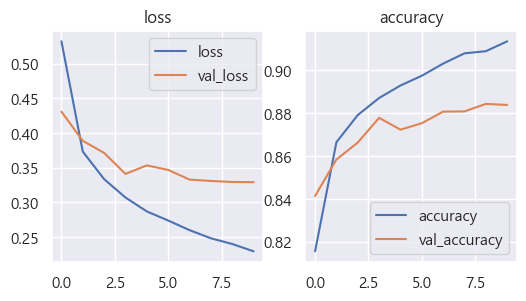

In [20]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [21]:
proba=model.predict(X_test_scaler)
proba[:3]

313/313 [==============================] - 1s 1ms/step


array([[1.5064272e-08, 2.5002129e-07, 1.7772500e-07, 1.8277518e-08,
        1.0206418e-08, 1.1626971e-03, 1.0186391e-07, 1.6095894e-03,
        3.5599381e-08, 9.9722713e-01],
       [4.9868581e-04, 1.1189962e-11, 9.9885190e-01, 8.8230268e-09,
        3.7896197e-04, 1.1179983e-10, 2.7037913e-04, 1.4401718e-12,
        1.3453253e-08, 2.3080764e-10],
       [7.0208322e-10, 1.0000000e+00, 2.9777202e-11, 2.6480480e-09,
        2.1252170e-11, 8.4385260e-17, 9.4522799e-11, 4.7308357e-19,
        8.0901579e-12, 5.9681529e-16]], dtype=float32)

In [22]:
pred=np.argmax(proba, axis=1)
y_test=np.argmax(y_test_oh,axis=1)

print(pred[:3],y_test[:3])

[9 2 1] [9 2 1]


## 오답 검증
- confusion_matrix
- crosstab

### confusion_matrix

In [23]:
from sklearn.metrics import confusion_matrix
res= confusion_matrix(y_test,pred)
res

array([[842,   1,  22,  15,   1,   0, 113,   0,   6,   0],
       [  2, 976,   2,  14,   3,   0,   1,   0,   2,   0],
       [ 16,   0, 865,  15,  62,   0,  41,   0,   1,   0],
       [ 29,  13,  16, 888,  26,   0,  24,   0,   4,   0],
       [  1,   0, 148,  36, 777,   0,  35,   0,   3,   0],
       [  0,   0,   0,   0,   0, 959,   0,  19,   1,  21],
       [124,   0, 124,  27,  69,   0, 644,   0,  12,   0],
       [  0,   0,   0,   0,   0,  10,   0, 931,   0,  59],
       [  6,   0,   4,   3,   2,   3,   2,   3, 977,   0],
       [  0,   0,   0,   0,   0,   4,   1,  16,   0, 979]], dtype=int64)

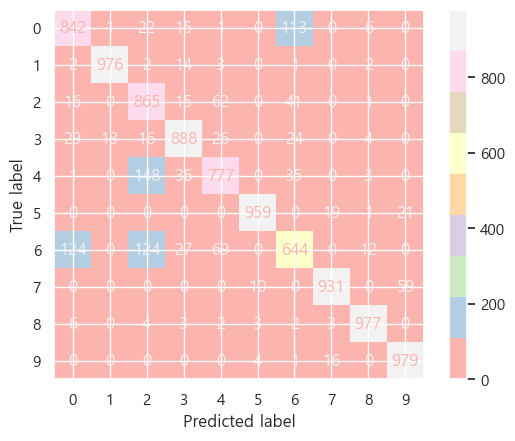

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=res)
disp.plot(cmap='Pastel1')
plt.show()

### crosstab

In [25]:
pd.crosstab(y_test,pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,842,1,22,15,1,0,113,0,6,0
1,2,976,2,14,3,0,1,0,2,0
2,16,0,865,15,62,0,41,0,1,0
3,29,13,16,888,26,0,24,0,4,0
4,1,0,148,36,777,0,35,0,3,0
5,0,0,0,0,0,959,0,19,1,21
6,124,0,124,27,69,0,644,0,12,0
7,0,0,0,0,0,10,0,931,0,59
8,6,0,4,3,2,3,2,3,977,0


### 오답 idx

In [26]:
ans_df=pd.DataFrame({"y_test":y_test,"pred":pred})
ans_df.head()

,y_test,pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [27]:
ans_df[ans_df['y_test']!=ans_df['pred']].sort_values('y_test').index

Int64Index([9251, 5297, 1305, 5259, 5144, 5119, 9291, 5032, 5030, 5028,
            ...
            5525, 5938, 5946, 4092, 1954, 7936, 6984, 7125, 9835, 5512],
           dtype='int64', length=1162)

In [28]:
idx_list=ans_df[ans_df['y_test']!=ans_df['pred']].sort_values('y_test').index
idx_list

Int64Index([9251, 5297, 1305, 5259, 5144, 5119, 9291, 5032, 5030, 5028,
            ...
            5525, 5938, 5946, 4092, 1954, 7936, 6984, 7125, 9835, 5512],
           dtype='int64', length=1162)

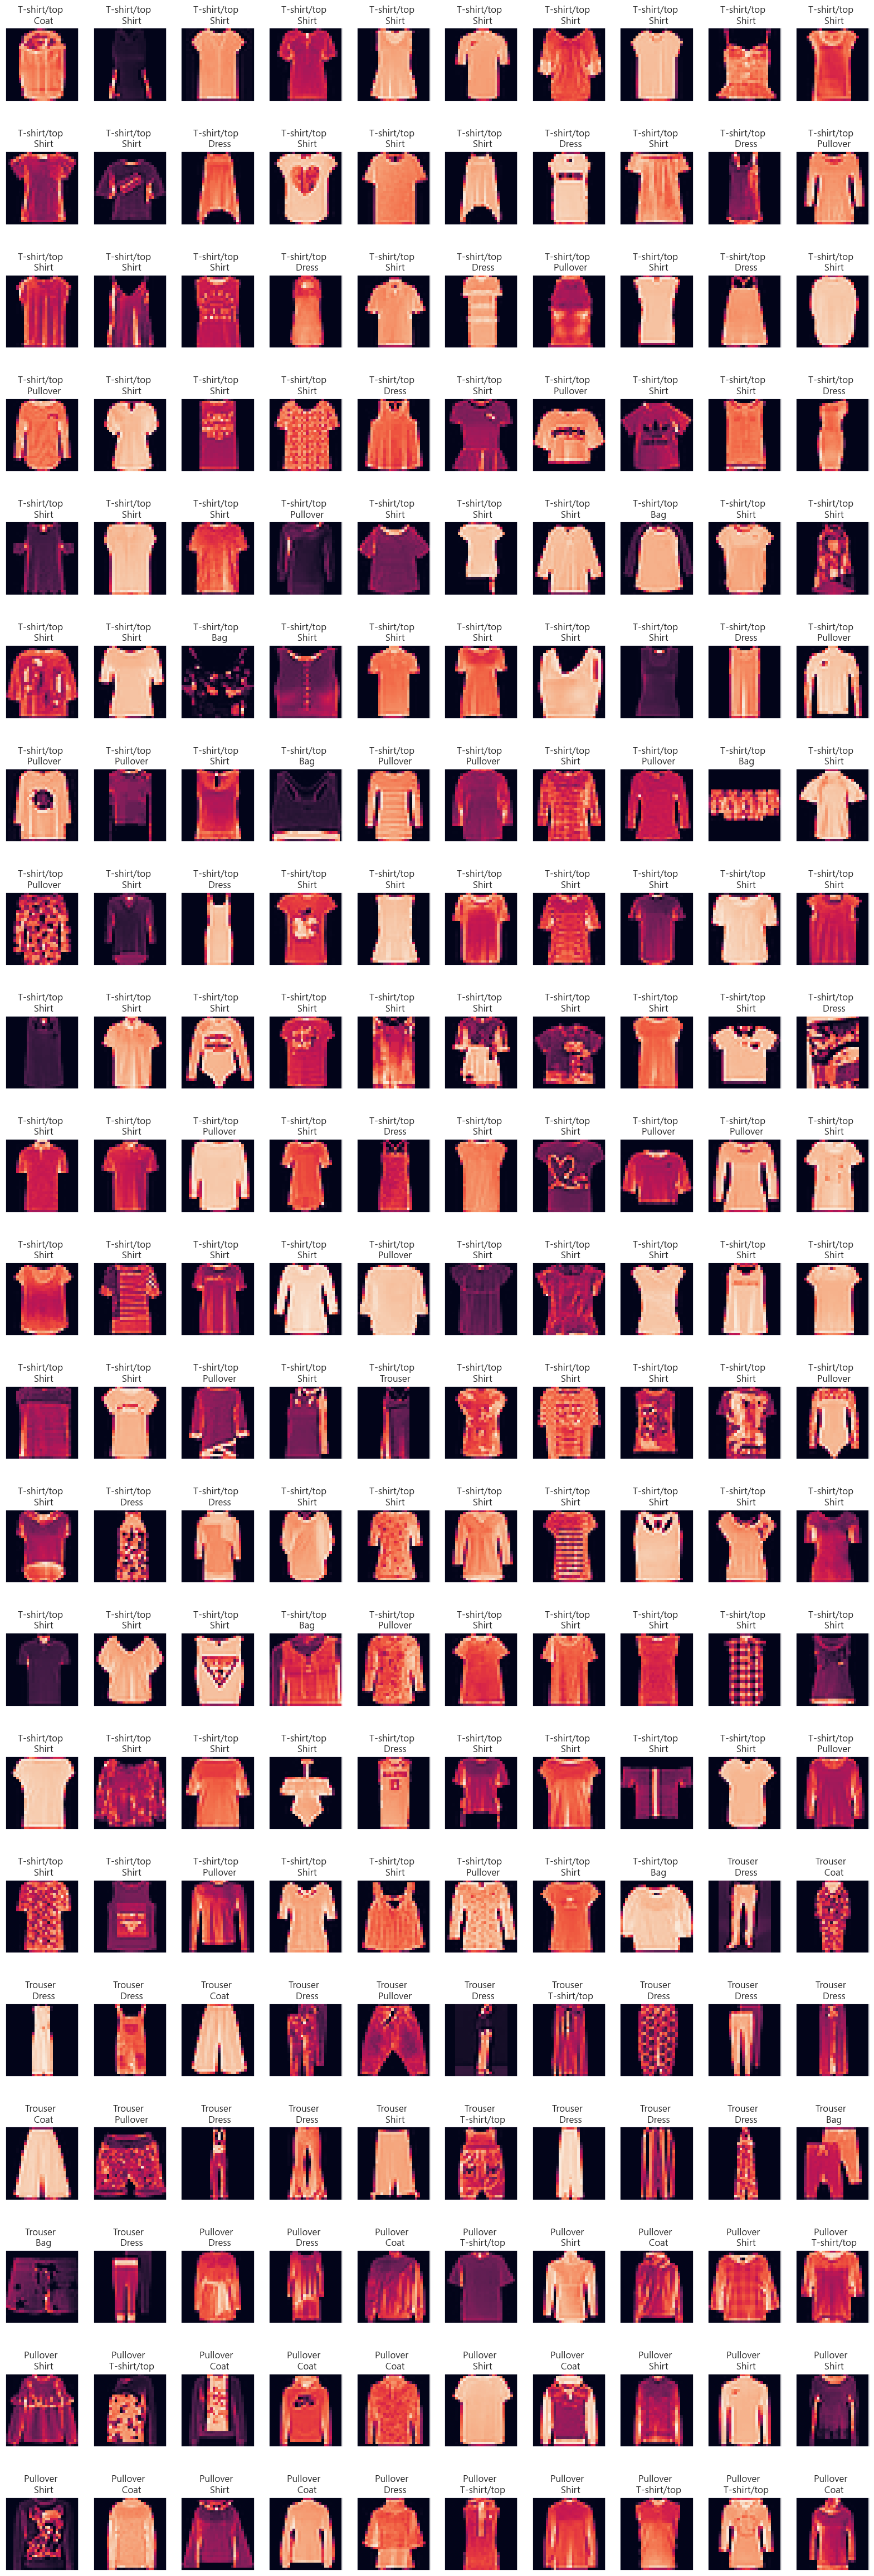

In [29]:
fig,axes= plt.subplots(21,10,figsize=(20,60))
for i,idx  in enumerate(idx_list[:210]):
    # print(i,idx_val)
    r=i//10
    c=i%10
    axes[r][c].imshow(X_test[idx].reshape(28,28))
    axes[r][c].set_title(f"{LABEL_NAME__[ans_df.loc[idx,'y_test']]} \n {LABEL_NAME__[ans_df.loc[idx,'pred']]}")
    # Hide axes,grid
    axes[r][c].grid(False)
    axes[r][c].set_xticks([])
    axes[r][c].set_yticks([])
# plt.tight_layout()
plt.show()

# 사용자 데이터 예측
- Widget
- ref : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [30]:
# ! pip install ipywidgets

In [31]:
import ipywidgets as widgets
btn =widgets.FileUpload(
    accept='image/*',  # '.png' '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=True  # True to accept multiple files upload else False
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [32]:
btn.value

()

In [33]:
for dic in btn.value:
    display(widgets.Image(value=dic['content'].tobytes()))

- PIL : https://ddolcat.tistory.com/690

In [34]:
from PIL import Image  # 파이썬 이미지 라이브러리
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1,len(btn.value),i+1)
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr = dic['content']      # 메모리 주소
    # bbyte = addr.tobytes()     # 메모리에 있는 것을 binary(bytes)로 꺼내옴
    # io_obj = io.BytesIO(addr)  # 메모리에 있는 것을 r,w 할 수 있는 io 객체를 꺼냄
    # print(addr, bbyte, io_obj)
    # ------------------------------------------------
    # display(widgets.Image(value=dic.content.tobytes()))  # 이미지 보기
    # ------------------------------------------------
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28)) # io 객체를 이용하여 이미지 오픈
    plt.imshow(img)
    # ------------------------------------------------
    print(np.array(img).shape,  np.array(img)[:, :, 1].shape)
    
    img = np.array(img)[:, :, 1]                    # (28, 28, 3) : 28*28로 맞추기 위해 컬러맵(3)을 제거 (차원축소)
    img = (np.expand_dims(img,0)).reshape(1,-1)     # img[None , ... ]  차원 확대 (1, 28, 28) 사진 1장  => flatten(1D)
    print(img.shape) 

    img_scaler = img/255.0    # scaling
    # img_scaler=( 255 - img ) / 255.0    # 색 반전(이미지 엣지 검출) : 흑백 반전  --> 예측력 ↑
    
    print(img_scaler.shape)
    proba = model.predict(img_scaler)
    print(LABEL_NAME__[np.argmax(proba)])